# DSCI 617 – Group Project
## Lahman Baseball Database
**Jeffery Boczkaja**

## Section A – Load and Prepare Data
We will load the necessary libraries for the project.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr, col

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

### A.1 – Load Data
We will load the data needed for the project and check the number of records in each.

In [0]:
people = spark.read.csv('/FileStore/tables/lahman/People.csv', header=True, inferSchema=True)
batting = spark.read.csv('/FileStore/tables/lahman/Batting.csv', header=True, inferSchema=True)
teams = spark.read.csv('/FileStore/tables/lahman/Teams.csv', header=True, inferSchema=True)
franchises = spark.read.csv('/FileStore/tables/lahman/TeamsFranchises.csv', header=True, inferSchema=True)

num_people = people.count()
num_batting = batting.count()
num_teams = teams.count()
num_franchises = franchises.count()

print(f'Number of records in people: {num_people}')
print(f'Number of records in batting: {num_batting}')
print(f'Number of records in teams: {num_teams}')
print(f'Number of records in franchises: {num_franchises}')

Number of records in people: 20150
Number of records in batting: 108789
Number of records in teams: 2955
Number of records in franchises: 120


### A.2 – The People Table
We will explore the people table. 

In [0]:
print(people.columns)

['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID']


In [0]:
selected_people = people.select("playerID", "nameFirst", "nameLast", "weight", "height")
selected_people.show(5)

+---------+---------+--------+------+------+
| playerID|nameFirst|nameLast|weight|height|
+---------+---------+--------+------+------+
|aardsda01|    David| Aardsma|   215|    75|
|aaronha01|     Hank|   Aaron|   180|    72|
|aaronto01|   Tommie|   Aaron|   190|    75|
| aasedo01|      Don|    Aase|   190|    75|
| abadan01|     Andy|    Abad|   184|    73|
+---------+---------+--------+------+------+
only showing top 5 rows



In [0]:
missing_values = people.rdd.map(
    lambda row: 1 if (None in row or '' in row) else 0
).sum()

print(f"Number of records with missing values: {missing_values}")

Number of records with missing values: 0


In [0]:
missing_counts_1 = {col: people.where(people[col].isNull() | (people[col] == "")).count() for col in people.columns[:len(people.columns)//2]}
print(missing_counts_1)

missing_counts_2 = {col: people.where(people[col].isNull() | (people[col] == "")).count() for col in people.columns[len(people.columns)//2:]}
print(missing_counts_2)

{'playerID': 0, 'birthYear': 114, 'birthMonth': 282, 'birthDay': 423, 'birthCountry': 61, 'birthState': 534, 'birthCity': 174, 'deathYear': 10232, 'deathMonth': 10233, 'deathDay': 10234, 'deathCountry': 10237, 'deathState': 10287}
{'deathCity': 10243, 'nameFirst': 37, 'nameLast': 0, 'nameGiven': 37, 'weight': 816, 'height': 736, 'bats': 1180, 'throws': 976, 'debut': 199, 'finalGame': 199, 'retroID': 54, 'bbrefID': 7}


### A.3 – The Batting Table
We will explore the batting table. 

In [0]:
print(batting.columns)

['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']


In [0]:
batting.show(5)

+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+
| playerID|yearID|stint|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO| IBB| HBP|  SH|  SF|GIDP|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+
|abercda01|  1871|    1|   TRO|  NA|  1|  4|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|null|null|null|null|   0|
| addybo01|  1871|    1|   RC1|  NA| 25|118| 30| 32|  6|  0|  0| 13|  8|  1|  4|  0|null|null|null|null|   0|
|allisar01|  1871|    1|   CL1|  NA| 29|137| 28| 40|  4|  5|  0| 19|  3|  1|  2|  5|null|null|null|null|   1|
|allisdo01|  1871|    1|   WS3|  NA| 27|133| 28| 44| 10|  2|  2| 27|  1|  1|  0|  2|null|null|null|null|   0|
|ansonca01|  1871|    1|   RC1|  NA| 25|120| 29| 39| 11|  3|  0| 16|  6|  2|  2|  1|null|null|null|null|   0|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+
only showi

In [0]:
missing_values_batting = batting.rdd.map(
    lambda row: 1 if (None in row or '' in row) else 0
).sum()

print(f"Number of records with missing values: {missing_values_batting}")

Number of records with missing values: 0


In [0]:
missing_counts_batting = {col: batting.where(batting[col].isNull() | (batting[col] == "")).count() for col in batting.columns}
print(missing_counts_batting)

{'playerID': 0, 'yearID': 0, 'stint': 0, 'teamID': 0, 'lgID': 0, 'G': 0, 'AB': 0, 'R': 0, 'H': 0, '2B': 0, '3B': 0, 'HR': 0, 'RBI': 756, 'SB': 2368, 'CS': 23541, 'BB': 0, 'SO': 2100, 'IBB': 36650, 'HBP': 2816, 'SH': 6068, 'SF': 36103, 'GIDP': 25441}


In [0]:
batting = batting.na.fill(0)
batting.show(5)

+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
| playerID|yearID|stint|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO|IBB|HBP| SH| SF|GIDP|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
|abercda01|  1871|    1|   TRO|  NA|  1|  4|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|   0|
| addybo01|  1871|    1|   RC1|  NA| 25|118| 30| 32|  6|  0|  0| 13|  8|  1|  4|  0|  0|  0|  0|  0|   0|
|allisar01|  1871|    1|   CL1|  NA| 29|137| 28| 40|  4|  5|  0| 19|  3|  1|  2|  5|  0|  0|  0|  0|   1|
|allisdo01|  1871|    1|   WS3|  NA| 27|133| 28| 44| 10|  2|  2| 27|  1|  1|  0|  2|  0|  0|  0|  0|   0|
|ansonca01|  1871|    1|   RC1|  NA| 25|120| 29| 39| 11|  3|  0| 16|  6|  2|  2|  1|  0|  0|  0|  0|   0|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
only showing top 5 rows



### A.4 – The Teams Table
We will explore the teams table. 

In [0]:
print(teams.columns)

['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro']


In [0]:
selected_teams = teams.select("yearID", "name", "teamID", "franchID", "lgID")
selected_teams.show(5, truncate=False)

+------+-----------------------+------+--------+----+
|yearID|name                   |teamID|franchID|lgID|
+------+-----------------------+------+--------+----+
|1871  |Boston Red Stockings   |BS1   |BNA     |NA  |
|1871  |Chicago White Stockings|CH1   |CNA     |NA  |
|1871  |Cleveland Forest Citys |CL1   |CFC     |NA  |
|1871  |Fort Wayne Kekiongas   |FW1   |KEK     |NA  |
|1871  |New York Mutuals       |NY2   |NNA     |NA  |
+------+-----------------------+------+--------+----+
only showing top 5 rows



In [0]:
missing_values_teams = teams.rdd.map(
    lambda row: 1 if (None in row or '' in row) else 0
).sum()

print(f"Number of records with missing values: {missing_values_teams}")

Number of records with missing values: 0


### A.5 – The Franchises Table
We will explore the franchises table. 

In [0]:
print(franchises.columns)

['franchID', 'franchName', 'active', 'NAassoc']


In [0]:
franchises.show(5, truncate=False)

+--------+-----------------------------+------+-------+
|franchID|franchName                   |active|NAassoc|
+--------+-----------------------------+------+-------+
|ALT     |Altoona Mountain City        |N     |null   |
|ANA     |Los Angeles Angels of Anaheim|Y     |null   |
|ARI     |Arizona Diamondbacks         |Y     |null   |
|ATH     |Philadelphia Athletics       |N     |PNA    |
|ATL     |Atlanta Braves               |Y     |BNA    |
+--------+-----------------------------+------+-------+
only showing top 5 rows



In [0]:
missing_values_franchises = franchises.rdd.map(
    lambda row: 1 if (None in row or '' in row) else 0
).sum()

print(f"Number of records with missing values: {missing_values_franchises}")

Number of records with missing values: 0


In [0]:
missing_counts_franchises = {col: franchises.where(franchises[col].isNull() | (franchises[col] == "")).count() for col in franchises.columns}
print(missing_counts_franchises)

{'franchID': 0, 'franchName': 0, 'active': 0, 'NAassoc': 108}


## Section B – Teams and Franchises

### B.1 – Number of Franchises by Year
We will determine the number of MLB franchises that existed each year. 

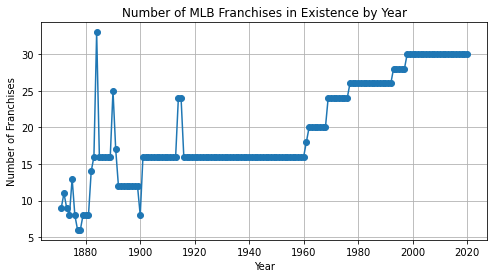

In [0]:
franchises_per_year = teams.groupBy("yearID").agg({"franchID": "count"}).withColumnRenamed("count(franchID)", "num_franchises")
franchises_per_year = franchises_per_year.sort("yearID")
franchises_per_year_pd = franchises_per_year.toPandas()

plt.figure(figsize=(8, 4))
plt.plot(franchises_per_year_pd['yearID'], franchises_per_year_pd['num_franchises'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Franchises')
plt.title('Number of MLB Franchises in Existence by Year')
plt.grid(True)
plt.show()

### B.2 – Franchise Statistics
We will calculate a few statistics for each franchise that has ever existed. We will use these
statistics in the subsequent subsections. 

In [0]:
franchise_summary = teams.groupBy("franchID").agg(
    expr("COUNT(DISTINCT name) AS num_names"),
    expr("MIN(yearID) AS first_year"),
    expr("MAX(yearID) AS last_year"),
    expr("COUNT(DISTINCT yearID) AS seasons"),
    expr("SUM(W) AS W"),
    expr("SUM(L) AS L")
)

franchise_summary = franchise_summary.withColumn("WL_ratio", expr("ROUND(W / L, 4)"))
franchise_summary = franchise_summary.join(franchises, "franchID")
print(f"Number of records in franchise_summary: {franchise_summary.count()}")
franchise_summary.show(10, truncate=False)

Number of records in franchise_summary: 120
+--------+---------+----------+---------+-------+----+----+--------+-------------------------+------+-------+
|franchID|num_names|first_year|last_year|seasons|W   |L   |WL_ratio|franchName               |active|NAassoc|
+--------+---------+----------+---------+-------+----+----+--------+-------------------------+------+-------+
|PHA     |1        |1882      |1890     |9      |560 |498 |1.1245  |Philadelphia Athletics   |N     |null   |
|NNA     |1        |1871      |1875     |5      |151 |122 |1.2377  |New York Mutuals         |NA    |NYU    |
|NYM     |1        |1962      |2020     |59     |4474|4842|0.924   |New York Mets            |Y     |null   |
|SNA     |1        |1875      |1875     |1      |39  |29  |1.3448  |St. Louis Brown Stockings|NA    |SBS    |
|BRA     |1        |1872      |1875     |4      |50  |140 |0.3571  |Brooklyn Atlantics       |NA    |null   |
|CHP     |1        |1890      |1890     |1      |75  |62  |1.2097  |Chicago 

### B.3 – Franchises with the Most Names
In this subsection, we will determine the greatest number of names that have been used by any one franchise. 

In [0]:
franchise_summary_sorted = franchise_summary.sort(col("num_names").desc())
franchise_summary_sorted.show(10, truncate=False)

+--------+---------+----------+---------+-------+-----+-----+--------+-----------------------------+------+-------+
|franchID|num_names|first_year|last_year|seasons|W    |L    |WL_ratio|franchName                   |active|NAassoc|
+--------+---------+----------+---------+-------+-----+-----+--------+-----------------------------+------+-------+
|LAD     |8        |1884      |2020     |137    |11017|9835 |1.1202  |Los Angeles Dodgers          |Y     |null   |
|ATL     |8        |1876      |2020     |145    |10732|10684|1.0045  |Atlanta Braves               |Y     |BNA    |
|CHC     |4        |1876      |2020     |145    |11016|10430|1.0562  |Chicago Cubs                 |Y     |CNA    |
|ANA     |4        |1961      |2020     |60     |4735 |4753 |0.9962  |Los Angeles Angels of Anaheim|Y     |null   |
|CLE     |4        |1901      |2020     |120    |9512 |9062 |1.0497  |Cleveland Indians            |Y     |null   |
|STL     |4        |1882      |2020     |139    |10948|10091|1.0849  |St

We will now list the names used by the franchise who has had the greatest number of names.

In [0]:
top_franchise_id = franchise_summary_sorted.select("franchID").first()[0]

top_franchise_teams = teams.filter(teams.franchID == top_franchise_id)
grouped_top_franchise = top_franchise_teams.groupBy("franchID", "name").agg(
    expr("MIN(yearID) AS first_year"),
    expr("MAX(yearID) AS last_year")
)

grouped_top_franchise_sorted = grouped_top_franchise.sort("first_year")
grouped_top_franchise_sorted.show(truncate=False)

+--------+--------------------+----------+---------+
|franchID|name                |first_year|last_year|
+--------+--------------------+----------+---------+
|LAD     |Brooklyn Atlantics  |1884      |1884     |
|LAD     |Brooklyn Grays      |1885      |1887     |
|LAD     |Brooklyn Bridegrooms|1888      |1898     |
|LAD     |Brooklyn Grooms     |1891      |1895     |
|LAD     |Brooklyn Superbas   |1899      |1913     |
|LAD     |Brooklyn Dodgers    |1911      |1957     |
|LAD     |Brooklyn Robins     |1914      |1931     |
|LAD     |Los Angeles Dodgers |1958      |2020     |
+--------+--------------------+----------+---------+



### B.4 – Age of Current Franchises
We will determine the ages of the 30 current franchises

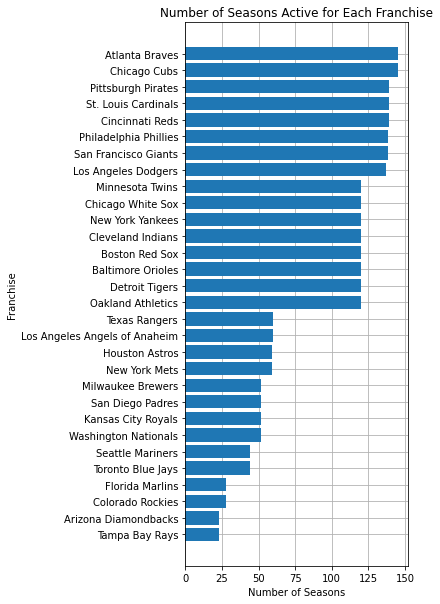

In [0]:
active_franchises = franchise_summary.filter(franchise_summary.active == "Y").sort("seasons")
active_franchises_pd = active_franchises.toPandas()

plt.figure(figsize=(4, 10))
plt.barh(active_franchises_pd['franchName'], active_franchises_pd['seasons'], zorder=2)
plt.xlabel('Number of Seasons')
plt.ylabel('Franchise')
plt.title('Number of Seasons Active for Each Franchise')
plt.grid(True)
plt.show()

### B.5 – Franchises with Best Win/Loss Ratios
We will identify the 10 franchises who have the best win/loss ratios.

In [0]:
franchise_summary_sorted = franchise_summary.select("franchID", "franchName", "seasons", "first_year", "last_year", "WL_ratio")
franchise_summary_sorted = franchise_summary_sorted.sort(col("WL_ratio").desc())

franchise_summary_sorted.show(10, truncate=False)

+--------+-------------------------+-------+----------+---------+--------+
|franchID|franchName               |seasons|first_year|last_year|WL_ratio|
+--------+-------------------------+-------+----------+---------+--------+
|BNA     |Boston Red Stockings     |5      |1871      |1875     |3.75    |
|MLU     |Milwaukee Brewers        |1      |1884      |1884     |2.0     |
|BRS     |Boston Reds              |2      |1890      |1891     |1.9333  |
|PNA     |Philadelphia Athletics   |5      |1871      |1875     |1.9186  |
|COR     |Cincinnati Outlaw Reds   |1      |1884      |1884     |1.9167  |
|HAR     |Hartford Dark Blues      |2      |1876      |1877     |1.625   |
|PRO     |Providence Grays         |8      |1878      |1885     |1.5755  |
|SBS     |St. Louis Brown Stockings|2      |1876      |1877     |1.4314  |
|MLA     |Milwaukee Brewers        |1      |1891      |1891     |1.4     |
|BWW     |Brooklyn Ward's Wonders  |1      |1890      |1890     |1.3571  |
+--------+---------------

### B.6 –Win/Loss Ratios in Recent Years
We will calculate the win/loss ratio for each of the current franchises during the period since
1998 (which was when the newest franchises were added). 

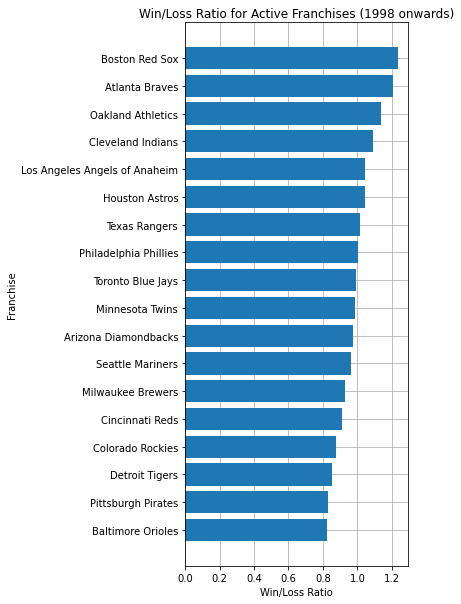

In [0]:
teams_1998_onwards = teams.filter(col("yearID") >= 1998)
win_loss_ratio = teams_1998_onwards.groupBy("teamID").agg(
    (expr("SUM(W) / SUM(L)")).alias("WL_ratio")
)

win_loss_ratio = win_loss_ratio.join(franchises, win_loss_ratio.teamID == franchises.franchID, "inner")
win_loss_ratio = win_loss_ratio.filter(col("active") == "Y")
win_loss_ratio = win_loss_ratio.sort(col("WL_ratio"))
win_loss_ratio_pd = win_loss_ratio.toPandas()

plt.figure(figsize=(4, 10))
plt.barh(win_loss_ratio_pd['franchName'], win_loss_ratio_pd['WL_ratio'], zorder=2)
plt.xlabel('Win/Loss Ratio')
plt.ylabel('Franchise')
plt.title('Win/Loss Ratio for Active Franchises (1998 onwards)')
plt.grid(True)
plt.show()

## Section C – Batter Statistics
We will calculate and explore certain career statistics for each player who has ever batted in an
MLB game. 

### C.1 – Calculating Career Statistics
We will calculate career statistics for each MLB batter.

In [0]:
batters = batting.groupBy("playerID").agg(
    expr("SUM(G) AS G"),
    expr("SUM(AB) AS AB"),
    expr("SUM(H) AS H"),
    expr("SUM(`2B`) AS 2B"),
    expr("SUM(`3B`) AS 3B"),
    expr("SUM(HR) AS HR"),
    expr("MIN(yearID) AS first_year"),
    expr("MAX(yearID) AS last_year"),
    expr("COUNT(DISTINCT yearID) AS seasons")
)

batters = batters.filter(col("AB") >= 1)
batters = batters.withColumn("BA", expr("ROUND(H / AB, 4)"))
batters = batters.withColumn("SP", expr("ROUND((H + `2B` + 2*`3B` + 3*HR) / AB, 4)"))
batters = batters.join(people, "playerID")
batters = batters.select("playerID", "nameFirst", "nameLast", "first_year", "last_year", "seasons", "height", "weight", "G", "AB", "H", "2B", "3B", "HR", "BA", "SP")

print(f"Number of records in batters: {batters.count()}")
batters.show(10)

Number of records in batters: 17593
+---------+---------+----------+----------+---------+-------+------+------+----+----+----+---+---+---+------+------+
| playerID|nameFirst|  nameLast|first_year|last_year|seasons|height|weight|   G|  AB|   H| 2B| 3B| HR|    BA|    SP|
+---------+---------+----------+----------+---------+-------+------+------+----+----+----+---+---+---+------+------+
|gilliba01|   Barney|  Gilligan|      1879|     1888|     10|    66|   130| 521|1865| 386| 68| 23|  3| 0.207|0.2729|
|steenmi01|     Milt|Steengrafe|      1924|     1926|      2|    72|   170|  16|  15|   0|  0|  0|  0|   0.0|   0.0|
|lefloro01|      Ron|   LeFlore|      1974|     1982|      9|    72|   200|1099|4458|1283|172| 57| 59|0.2878|0.3917|
|simpsdi01|     Dick|   Simpson|      1962|     1969|      7|    76|   176| 288| 518| 107| 19|  2| 15|0.2066|0.3378|
|gonzaal01|     Alex|  Gonzalez|      1994|     2006|     13|    72|   180|1396|4977|1209|274| 27|137|0.2429|0.3914|
|myersro01|   Rodney|     My

### C.2 – Most Seasons Played
We will identify the 10 batters who have played in the most seasons. 

In [0]:
batters_sorted = batters.select("nameFirst", "nameLast", "first_year", "last_year", "seasons")
batters_sorted = batters_sorted.sort(col("seasons").desc())

batters_sorted.show(10, truncate=False)

+---------+---------+----------+---------+-------+
|nameFirst|nameLast |first_year|last_year|seasons|
+---------+---------+----------+---------+-------+
|Nolan    |Ryan     |1966      |1993     |27     |
|Cap      |Anson    |1871      |1897     |27     |
|Deacon   |McGuire  |1884      |1912     |26     |
|Tommy    |John     |1963      |1989     |26     |
|Charlie  |Hough    |1970      |1994     |25     |
|Jamie    |Moyer    |1986      |2012     |25     |
|Jim      |Kaat     |1959      |1983     |25     |
|Eddie    |Collins  |1906      |1930     |25     |
|Bobby    |Wallace  |1894      |1918     |25     |
|Rickey   |Henderson|1979      |2003     |25     |
+---------+---------+----------+---------+-------+
only showing top 10 rows



### C.3 – Most At-Bats
We will identify the 10 batters who have had the greatest number of at-bats.

In [0]:
batters_sorted_AB = batters.select("nameFirst", "nameLast", "seasons", "AB")
batters_sorted_AB = batters_sorted_AB.sort(col("AB").desc())

batters_sorted_AB.show(10, truncate=False)

+---------+-----------+-------+-----+
|nameFirst|nameLast   |seasons|AB   |
+---------+-----------+-------+-----+
|Pete     |Rose       |24     |14053|
|Hank     |Aaron      |23     |12364|
|Carl     |Yastrzemski|23     |11988|
|Cal      |Ripken     |21     |11551|
|Ty       |Cobb       |24     |11436|
|Eddie    |Murray     |21     |11336|
|Derek    |Jeter      |20     |11195|
|Adrian   |Beltre     |21     |11068|
|Robin    |Yount      |20     |11008|
|Dave     |Winfield   |22     |11003|
+---------+-----------+-------+-----+
only showing top 10 rows



### C.4 – Highest Batting Average
We will identify the 10 batters who have the highest batting averages. To remove outliers, we
will limit our attention to players who have had at least 100 at-bats.

In [0]:
batters_filtered = batters.filter(col("AB") >= 100).select("nameFirst", "nameLast", "AB", "BA")
batters_sorted_BA = batters_filtered.sort(col("BA").desc())

batters_sorted_BA.show(10, truncate=False)

+------------+---------+-----+------+
|nameFirst   |nameLast |AB   |BA    |
+------------+---------+-----+------+
|Ty          |Cobb     |11436|0.3663|
|Ross        |Barnes   |2391 |0.3597|
|Rogers      |Hornsby  |8173 |0.3585|
|Shoeless Joe|Jackson  |4981 |0.3558|
|Levi        |Meyerle  |1443 |0.3555|
|Steve       |King     |272  |0.3529|
|Lefty       |O'Doul   |3264 |0.3493|
|George      |Nicol    |147  |0.3469|
|Ed          |Delahanty|7510 |0.3458|
|Cal         |McVey    |2513 |0.3458|
+------------+---------+-----+------+
only showing top 10 rows



### C.5 – Highest Slugging Percentage
In this subsection, we will identify the 10 batters who have the slugging percentages. To remove outliers, we will
limit our attention to players who have had at least 100 at-bats.

In [0]:
batters_filtered_SP = batters.filter(col("AB") >= 100).select("nameFirst", "nameLast", "AB", "SP")
batters_sorted_SP = batters_filtered_SP.sort(col("SP").desc())

batters_sorted_SP.show(10, truncate=False)

+---------+---------+----+------+
|nameFirst|nameLast |AB  |SP    |
+---------+---------+----+------+
|Babe     |Ruth     |8398|0.6898|
|Yordan   |Alvarez  |321 |0.6542|
|Edwin    |Rios     |123 |0.6341|
|Ted      |Williams |7706|0.6338|
|Lou      |Gehrig   |8001|0.6324|
|Jimmie   |Foxx     |8134|0.6093|
|Barry    |Bonds    |9847|0.6069|
|Hank     |Greenberg|5193|0.605 |
|John     |Bass     |100 |0.6   |
|Mark     |McGwire  |6187|0.5882|
+---------+---------+----+------+
only showing top 10 rows



### C.6 – Relationship between Batting Average and Slugging Percentage
We will graphically explore the relationship between batting average and slugging percentage.

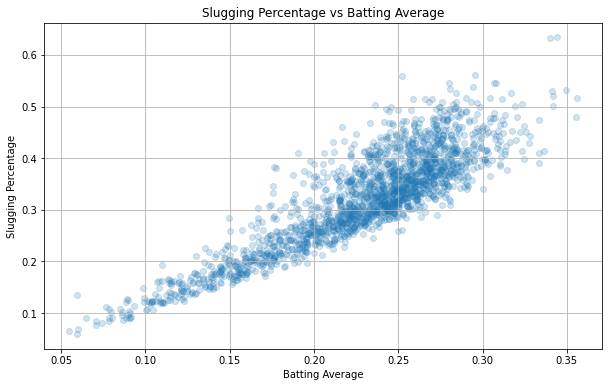

In [0]:
batters_filtered = batters.filter(col("AB") >= 100)
batters_sample = batters_filtered.sample(False, 0.2, seed=1)
batters_sample_pd = batters_sample.toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(batters_sample_pd['BA'], batters_sample_pd['SP'], alpha=0.2)
plt.xlabel('Batting Average')
plt.ylabel('Slugging Percentage')
plt.title('Slugging Percentage vs Batting Average')
plt.grid(True)
plt.show()

## Section D – Trends over Time
We will explore how certain statistics have changed during the history of the MLB.

### D.1 – Calculating Averages by Year
We will calculate the average height and weight of players by year, as well as the overall
batting averages and slugging percentages for all players by year.

In [0]:
batting_with_people = batting.join(people, "playerID")

by_year = batting_with_people.groupBy("yearID").agg(
    expr("AVG(weight) AS avg_wt"),
    expr("AVG(height) AS avg_ht"),
    expr("SUM(AB) AS AB"),
    expr("SUM(H) AS H"),
    expr("SUM(`2B`) AS 2B"),
    expr("SUM(`3B`) AS 3B"),
    expr("SUM(HR) AS HR")
)

by_year = by_year.withColumn("BA", expr("ROUND(H / AB, 4)"))
by_year = by_year.withColumn("SP", expr("ROUND((H + `2B` + 2*`3B` + 3*HR) / AB, 4)"))
by_year = by_year.sort("yearID")
by_year_pd = by_year.toPandas()

print(by_year_pd.head())

   yearID      avg_wt     avg_ht     AB     H   2B   3B  HR      BA      SP
0    1871  157.049505  68.509804  10822  3101  434  239  47  0.2865  0.3838
1    1872  159.847458  68.533333  15665  4467  581  145  37  0.2852  0.3478
2    1873  160.236559  68.612903  16959  4926  570  211  47  0.2905  0.3573
3    1874  161.075269  68.582418  19104  5224  634  194  40  0.2735  0.3332
4    1875  162.269461  68.725610  26833  6812  839  273  40  0.2539  0.3100


### D.2 – Trends for Height and Weight
We will graphically explore the trends for player height and weight over time. 

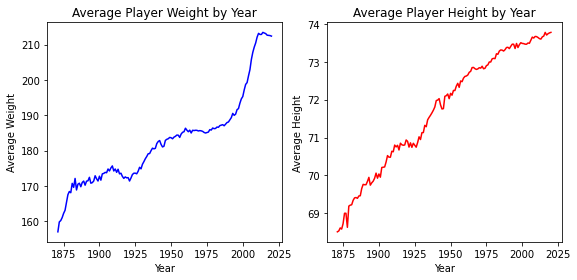

In [0]:
plt.figure(figsize=[8,4])

plt.subplot(1, 2, 1)
plt.plot(by_year_pd['yearID'], by_year_pd['avg_wt'], color='blue')
plt.title('Average Player Weight by Year')
plt.xlabel('Year')
plt.ylabel('Average Weight')

plt.subplot(1, 2, 2)
plt.plot(by_year_pd['yearID'], by_year_pd['avg_ht'], color='red')
plt.title('Average Player Height by Year')
plt.xlabel('Year')
plt.ylabel('Average Height')

plt.tight_layout()
plt.show()

### D.3 – Trends for Batting Statistics
We will graphically explore the trends for batting average and slugging percentage over time. 

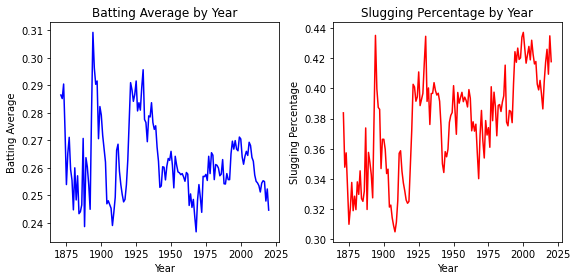

In [0]:
plt.figure(figsize=[8,4])

plt.subplot(1, 2, 1)
plt.plot(by_year_pd['yearID'], by_year_pd['BA'], color='blue')
plt.title('Batting Average by Year')
plt.xlabel('Year')
plt.ylabel('Batting Average')

plt.subplot(1, 2, 2)
plt.plot(by_year_pd['yearID'], by_year_pd['SP'], color='red')
plt.title('Slugging Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Slugging Percentage')

plt.tight_layout()
plt.show()

### D.4 – Trends for American and National Leagues
We will recreate the results from the previous two subsections, but we will look at the two
leagues separately. We will also limit our attention to years since 1960. 

In [0]:
recent_years = batting_with_people.filter(batting_with_people.yearID >= 1960)

by_year_and_league = recent_years.groupBy(["yearID", "lgID"]).agg(
    expr("AVG(weight) AS avg_wt"),
    expr("AVG(height) AS avg_ht"),
    expr("SUM(AB) AS AB"),
    expr("SUM(H) AS H"),
    expr("SUM(`2B`) AS 2B"),
    expr("SUM(`3B`) AS 3B"),
    expr("SUM(HR) AS HR")
)

by_year_and_league = by_year_and_league.withColumn("BA", expr("ROUND(H / AB, 4)"))
by_year_and_league = by_year_and_league.withColumn("SP", expr("ROUND((H + `2B` + 2*`3B` + 3*HR) / AB, 4)"))
by_year_and_league = by_year_and_league.sort("yearID", "lgID")
by_year_and_league_pd = by_year_and_league.toPandas()

print(by_year_and_league_pd.head())

   yearID lgID      avg_wt     avg_ht     AB      H    2B   3B    HR      BA  \
0    1960   AL  186.476489  72.564263  41838  10689  1720  274  1086  0.2555   
1    1960   NL  186.210692  72.663522  42176  10745  1722  384  1042  0.2548   
2    1961   AL  185.774194  72.528536  54904  14037  2226  404  1534  0.2557   
3    1961   NL  185.820339  72.755932  42128  11029  1749  350  1196  0.2618   
4    1962   AL  185.378238  72.663212  55239  14068  2238  400  1552  0.2547   

       SP  
0  0.3876  
1  0.3879  
2  0.3947  
3  0.4051  
4  0.3940  


We will now recreate the plots from the previous subsections, but with curves for each of the two leagues.

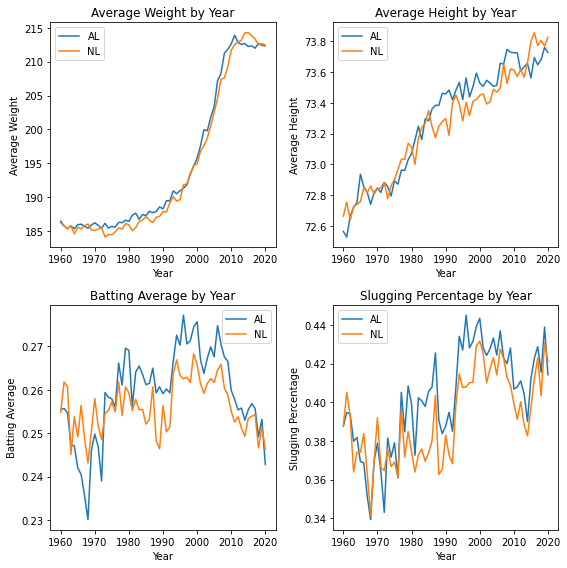

In [0]:
AL = by_year_and_league_pd[by_year_and_league_pd['lgID'] == 'AL']
NL = by_year_and_league_pd[by_year_and_league_pd['lgID'] == 'NL']

plt.figure(figsize=[8,8])

metrics = ['avg_wt', 'avg_ht', 'BA', 'SP']
titles = ['Average Weight by Year', 'Average Height by Year', 'Batting Average by Year', 'Slugging Percentage by Year']
y_labels = ['Average Weight', 'Average Height', 'Batting Average', 'Slugging Percentage']

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.plot(AL['yearID'], AL[metric], label='AL')
    plt.plot(NL['yearID'], NL[metric], label='NL')
    plt.title(titles[i])
    plt.xlabel('Year')
    plt.ylabel(y_labels[i])
    plt.legend()

plt.tight_layout()
plt.show()

### D.5 – Average Number of Games
We will determine the average number of games played by each team during each MLB
season. 

In [0]:
games_per_season = teams.groupBy("yearID").agg(
    expr("SUM(G) AS G"),
    expr("COUNT(DISTINCT franchID) AS num_franch")
)

games_per_season = games_per_season.withColumn("avg_games", expr("ROUND(G / num_franch, 1)"))
games_per_season = games_per_season.sort("yearID")
games_per_season_pd = games_per_season.toPandas()

print(games_per_season_pd.head())

   yearID    G  num_franch  avg_games
0    1871  254           9       28.2
1    1872  366          11       33.3
2    1873  398           9       44.2
3    1874  464           8       58.0
4    1875  690          13       53.1


We will now visually explore the trends in the average number of games per season over time.

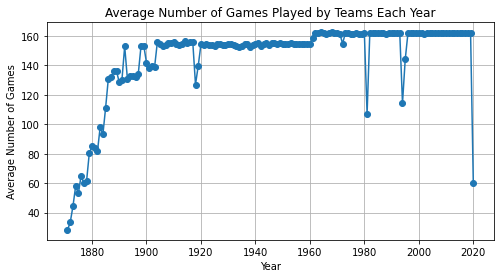

In [0]:
plt.figure(figsize=[8,4])
plt.plot(games_per_season_pd['yearID'], games_per_season_pd['avg_games'], marker='o')

plt.title('Average Number of Games Played by Teams Each Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Games')

plt.grid(visible=True)

plt.show()

## Section E
We will explore some data relating to salaries.

### E.1 - Load Data
We will load salary data.

In [0]:
salaries = spark.read.csv('/FileStore/tables/lahman/Salaries.csv', header=True, inferSchema=True)
num_salaries = salaries.count()
print(f'Number of records in people: {num_salaries}')

Number of records in people: 26428


### E.2 - Salaries Table
We will explore the names of the columns.

In [0]:
print(salaries.columns)

['yearID', 'teamID', 'lgID', 'playerID', 'salary']


### E.3 Average Salary per Year
We will find the average salary per year.

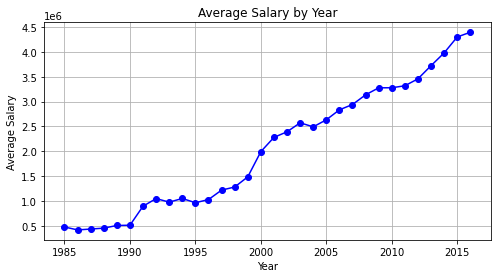

In [0]:
avg_salary = salaries.groupBy("yearID").agg(
    expr("AVG(salary) AS avg_salary")
)

avg_salary = avg_salary.sort("yearID")

avg_salary_pd = avg_salary.toPandas()

plt.figure(figsize=[8,4])
plt.plot(avg_salary_pd['yearID'], avg_salary_pd['avg_salary'], marker='o', color='b')

plt.title('Average Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')

plt.grid(visible=True)

plt.show()

### E.4 - Top and Bottom Salaries.
We will find the top and bottom salaries after the year 2000.

In [0]:
salaries_2000 = salaries.filter(salaries["yearID"] > 2000)
player_salaries = salaries_2000.join(people, "playerID", "inner").select("playerID", "nameFirst", "nameLast", "yearID", "salary")
top_10_salaries = player_salaries.orderBy(player_salaries["salary"].desc()).limit(10)
bottom_10_salaries = player_salaries.orderBy(player_salaries["salary"]).limit(10)

print("Top 10 Salaries:")
top_10_salaries.show(truncate=False)

print("\nBottom 10 Salaries:")
bottom_10_salaries.show(truncate=False)

Top 10 Salaries:
+---------+---------+---------+------+--------+
|playerID |nameFirst|nameLast |yearID|salary  |
+---------+---------+---------+------+--------+
|kershcl01|Clayton  |Kershaw  |2016  |33000000|
|rodrial01|Alex     |Rodriguez|2010  |33000000|
|rodrial01|Alex     |Rodriguez|2009  |33000000|
|kershcl01|Clayton  |Kershaw  |2015  |32571000|
|rodrial01|Alex     |Rodriguez|2011  |32000000|
|greinza01|Zack     |Greinke  |2016  |31799030|
|priceda01|David    |Price    |2016  |30000000|
|rodrial01|Alex     |Rodriguez|2012  |30000000|
|rodrial01|Alex     |Rodriguez|2013  |29000000|
|cabremi01|Miguel   |Cabrera  |2016  |28000000|
+---------+---------+---------+------+--------+


Bottom 10 Salaries:
+---------+---------+---------+------+------+
|playerID |nameFirst|nameLast |yearID|salary|
+---------+---------+---------+------+------+
|cabremi01|Miguel   |Cabrera  |2003  |165574|
|beimejo01|Joe      |Beimel   |2001  |200000|
|burrose01|Sean     |Burroughs|2002  |200000|
|barnejo01|Jo

### E.5 Top Team Salaries
We will display the top team salaries for the year 2016.

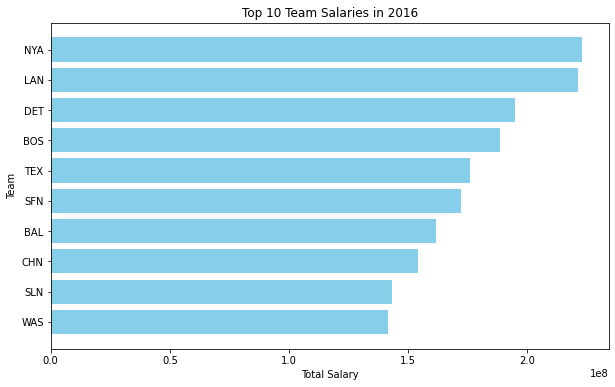

In [0]:
from pyspark.sql.functions import sum as _sum
salaries_2016 = salaries.filter(salaries["yearID"] == 2016)
try:
    team_salaries_2016 = salaries_2016.groupBy("teamID").agg(_sum("salary").alias("total_salary"))
    top_teams_2016 = team_salaries_2016.orderBy(col("total_salary").desc()).limit(10)
    top_teams_pd_2016 = top_teams_2016.toPandas()

    plt.figure(figsize=(10,6))
    plt.barh(top_teams_pd_2016['teamID'], top_teams_pd_2016['total_salary'], color='skyblue')
    plt.xlabel('Total Salary')
    plt.ylabel('Team')
    plt.title('Top 10 Team Salaries in 2016')
    plt.gca().invert_yaxis()  # to have the team with the highest salary on top
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

## Section F - Managers
We will explore some facts about managers in the MLB.

### F.1 - Load Data
We will load the managers data table.

In [0]:
managers = spark.read.csv('/FileStore/tables/lahman/Managers.csv', header=True, inferSchema=True)
num_managers = managers.count()
print(f'Number of records in people: {num_managers}')

Number of records in people: 3567


### F.2 - Managers Table
We will explore the columns of the managers table.

In [0]:
managers.show(5)

+---------+------+------+----+--------+---+---+---+----+-------+
| playerID|yearID|teamID|lgID|inseason|  G|  W|  L|rank|plyrMgr|
+---------+------+------+----+--------+---+---+---+----+-------+
|wrighha01|  1871|   BS1|  NA|       1| 31| 20| 10|   3|      Y|
| woodji01|  1871|   CH1|  NA|       1| 28| 19|  9|   2|      Y|
|paborch01|  1871|   CL1|  NA|       1| 29| 10| 19|   8|      Y|
|lennobi01|  1871|   FW1|  NA|       1| 14|  5|  9|   8|      Y|
|deaneha01|  1871|   FW1|  NA|       2|  5|  2|  3|   8|      Y|
+---------+------+------+----+--------+---+---+---+----+-------+
only showing top 5 rows



### F.3 - Longest Tenure
We will find the Managers who performed their duties for the longest.

In [0]:
manager_years = managers.groupBy("playerID").agg(expr("count(distinct yearID) as years_managed"))
top_managers = manager_years.orderBy(col("years_managed").desc()).limit(10)
top_managers.show()

+---------+-------------+
| playerID|years_managed|
+---------+-------------+
| mackco01|           53|
|larusto01|           33|
|mcgrajo01|           33|
|  coxbo01|           29|
|harribu01|           29|
|torrejo01|           29|
|mauchge01|           26|
|andersp01|           26|
|stengca01|           25|
|mckecbi01|           25|
+---------+-------------+



### F.4 Distinct Managers
We will see what teams have had the most and the least unique managers.

In [0]:
team_manager_counts = managers.groupBy("teamID").agg(expr("COUNT(DISTINCT playerID) as unique_managers"))
top_teams = team_manager_counts.orderBy(col("unique_managers").desc()).limit(5)
bottom_teams = team_manager_counts.orderBy(col("unique_managers")).limit(5)

top_teams.show()
bottom_teams.show()

+------+---------------+
|teamID|unique_managers|
+------+---------------+
|   CHN|             61|
|   CIN|             58|
|   SLN|             55|
|   PHI|             55|
|   BOS|             48|
+------+---------------+

+------+---------------+
|teamID|unique_managers|
+------+---------------+
|   MID|              1|
|   BSU|              1|
|   CHP|              1|
|   ELI|              1|
|   ML3|              1|
+------+---------------+



Now we will show what teams have had the most and least managers since 1990.

In [0]:
managers_after_1990 = managers.filter(managers.yearID > 1990)
team_manager_counts = managers_after_1990.groupBy(managers_after_1990.teamID).agg({'playerID': 'count'}).withColumnRenamed("count(playerID)", "unique_managers")
top_5_teams = team_manager_counts.orderBy("unique_managers", ascending=False).limit(5)
bottom_5_teams = team_manager_counts.orderBy("unique_managers").limit(5)

print("Top 5 Teams by Unique Managers (Years after 1990):")
top_5_teams.show()

print("Bottom 5 Teams by Unique Managers (Years after 1990):")
bottom_5_teams.show()

Top 5 Teams by Unique Managers (Years after 1990):
+------+---------------+
|teamID|unique_managers|
+------+---------------+
|   KCA|             38|
|   CIN|             37|
|   HOU|             37|
|   TOR|             36|
|   BAL|             35|
+------+---------------+

Bottom 5 Teams by Unique Managers (Years after 1990):
+------+---------------+
|teamID|unique_managers|
+------+---------------+
|   ML4|              7|
|   ANA|              9|
|   MIA|             10|
|   CAL|             12|
|   LAA|             16|
+------+---------------+



### F.5 - Winningest Managers
We will display the most winningest managers by season and career.

In [0]:
season_wins = managers.groupBy("playerID", "yearID").agg({"W": "sum"}).withColumnRenamed("sum(W)", "season_wins")
top_10_season_wins = season_wins.orderBy("season_wins", ascending=False).limit(10)

print("Top 10 Winning Coaches by Individual Season:")
top_10_season_wins.show()

Top 10 Winning Coaches by Individual Season:
+---------+------+-----------+
| playerID|yearID|season_wins|
+---------+------+-----------+
|pinielo01|  2001|        116|
|chancfr01|  1906|        116|
|torrejo01|  1998|        114|
|lopezal01|  1954|        111|
|huggimi01|  1927|        110|
|clarkfr01|  1909|        110|
| houkra01|  1961|        109|
|weaveea99|  1969|        109|
|andersp01|  1975|        108|
| coraal01|  2018|        108|
+---------+------+-----------+



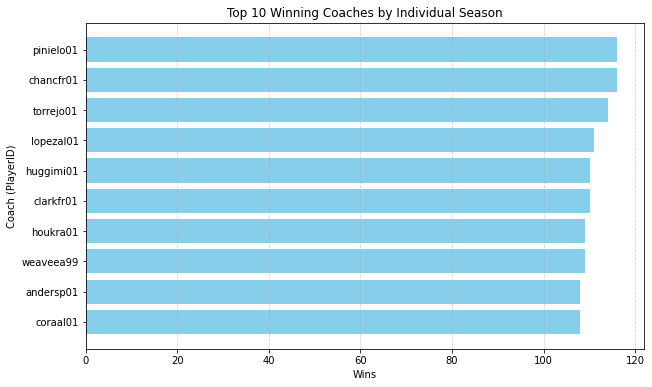

In [0]:
coaches_season = top_10_season_wins.select("playerID").rdd.flatMap(lambda x: x).collect()
season_wins = top_10_season_wins.select("season_wins").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))
plt.barh(coaches_season, season_wins, color='skyblue')
plt.xlabel('Wins')
plt.ylabel('Coach (PlayerID)')
plt.title('Top 10 Winning Coaches by Individual Season')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [0]:
career_wins = managers.groupBy("playerID").agg({"W": "sum"}).withColumnRenamed("sum(W)", "career_wins")
top_10_career_wins = career_wins.orderBy("career_wins", ascending=False).limit(10)

print("Top 10 Winning Coaches in Their Career:")
top_10_career_wins.show()

Top 10 Winning Coaches in Their Career:
+---------+-----------+
| playerID|career_wins|
+---------+-----------+
| mackco01|       3731|
|mcgrajo01|       2763|
|larusto01|       2728|
|  coxbo01|       2504|
|torrejo01|       2326|
|andersp01|       2194|
|harribu01|       2158|
|mccarjo99|       2125|
|alstowa01|       2040|
|durocle01|       2008|
+---------+-----------+



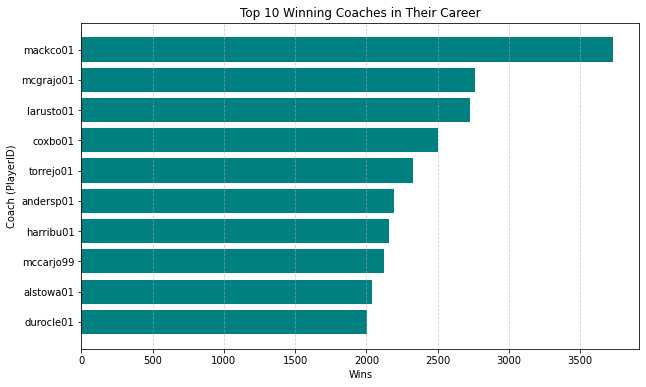

In [0]:
coaches_career = top_10_career_wins.select("playerID").rdd.flatMap(lambda x: x).collect()
career_wins = top_10_career_wins.select("career_wins").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))
plt.barh(coaches_career, career_wins, color='teal')
plt.xlabel('Wins')
plt.ylabel('Coach (PlayerID)')
plt.title('Top 10 Winning Coaches in Their Career')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()